In [10]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL, UniPCMultistepScheduler
import torch
from diffusers.utils import load_image


import numpy as np


import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
controlnets = [
    ControlNetModel.from_pretrained("./albedo_control/controlnet_1/", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("./canny/", torch_dtype=torch.float16),
]
pipe = StableDiffusionControlNetPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", controlnet=controlnets, torch_dtype=torch.float16)

vae\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [12]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


In [76]:
def styletransfer(shadow, albedo):
    images = [shadow, albedo]
    # generator = np.random.seed(0)
    image = pipe(
    "",
    num_inference_steps=20,
    image=images,
    controlnet_conditioning_scale=[1.0, 1.0],
    control_guidance_start=[0.3,0.0],
    control_guidance_end=[1.0,1.0],
    # generator=generator,
    # guess_mode=True,
    
    ).images[0]
    # plot the image

    #plot the shadow, albedo and image
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.imshow(shadow)
    plt.title('shadow')
    plt.subplot(132)
    plt.imshow(albedo)
    plt.title('albedo')
    plt.subplot(133)
    plt.imshow(image)
    plt.title('image')
    plt.show()

In [85]:
shadow = load_image('./bedroom/scratch/scratch_bedroom.jpg')
#resize shadow to 256*256
shadow = shadow.resize((256,256))
# error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
# > Overload resolution failed:
# >  - src is not a numpy array, neither a scalar
# >  - Expected Ptr for argument 'src'
# shadow = cv2.resize(shadow, (256, 256))
img_np = np.array(shadow)

# Convert the image to grayscale for Canny edge detection
gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
# edges = cv2.Canny(gray, 50, 150)

  0%|          | 0/20 [00:00<?, ?it/s]

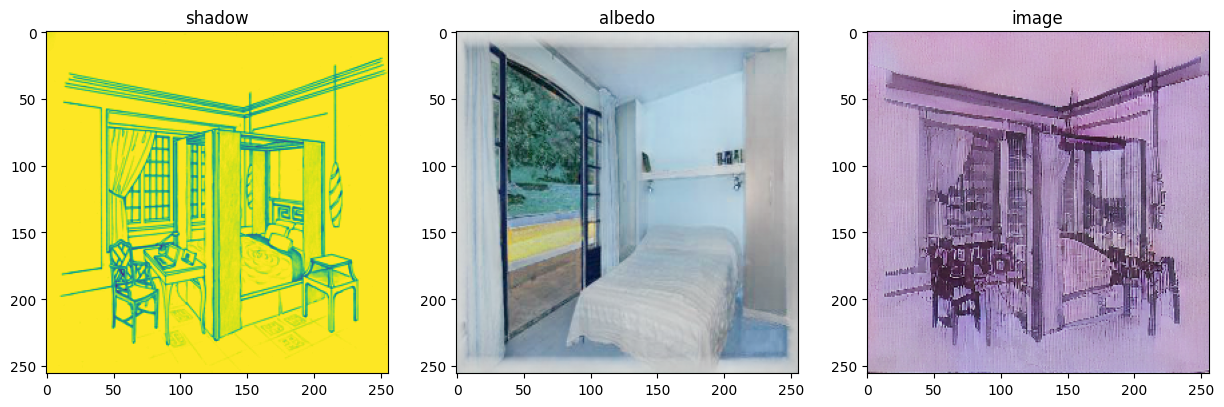

In [86]:
albedo = load_image('./samples/6b3e84ec82a58467a51eb6c5899ddd1dde1af7ab_pred_alb.png')

styletransfer(Image.fromarray(gray), albedo)

  0%|          | 0/20 [00:00<?, ?it/s]

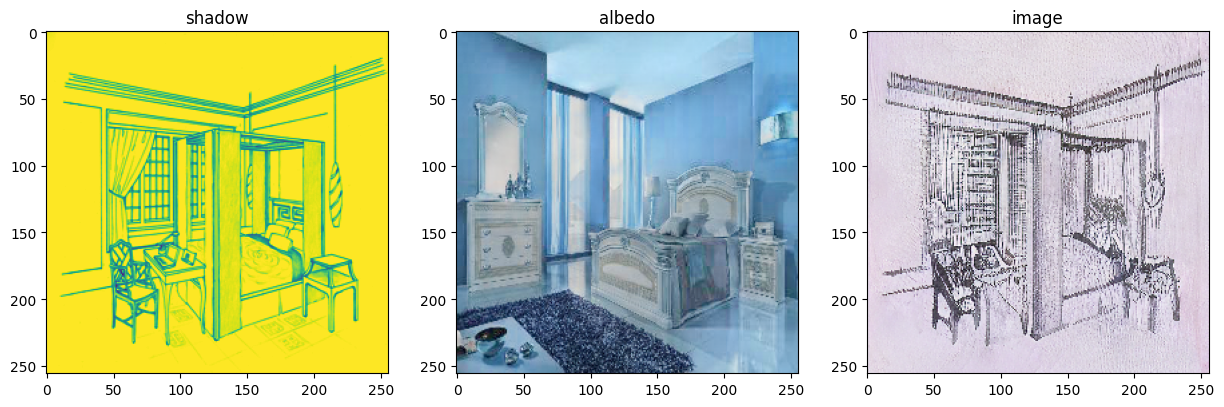

In [87]:
albedo2 = load_image('./samples/62f95f66e33ad38a252eb14f00a5b0ed51790f47_pred_alb.png')
styletransfer(Image.fromarray(gray), albedo2)